In [ ]:
#Nama : Rully Lukas
#Kelas: TK44-G2
#NIM  : 1103200181

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

dataset_path = '/content/drive/MyDrive/dataset/kc_house_data.csv'

df = pd.read_csv(dataset_path)
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
# Fitur Numerik
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Fitur Kategorikal
categorical_features = ['date', 'zipcode', 'waterfront', 'view', 'condition', 'grade']

# Target
target = ['price']

# Mencari jumlah nilai unik untuk semua fitur
unique_values = {}
for feature in numerical_features + categorical_features + target:
    unique_values[feature] = len(df[feature].unique())

# Menampilkan hasil pengelompokan
print("Jumlah Nilai Unik untuk Semua Fitur:")
for feature, values in unique_values.items():
    print(f"{feature}: {values} unique values")

Jumlah Nilai Unik untuk Semua Fitur:
bedrooms: 13 unique values
bathrooms: 30 unique values
sqft_living: 1038 unique values
sqft_lot: 9782 unique values
floors: 6 unique values
sqft_above: 947 unique values
sqft_basement: 306 unique values
yr_built: 116 unique values
yr_renovated: 70 unique values
lat: 5034 unique values
long: 752 unique values
sqft_living15: 777 unique values
sqft_lot15: 8689 unique values
date: 372 unique values
zipcode: 70 unique values
waterfront: 2 unique values
view: 5 unique values
condition: 5 unique values
grade: 12 unique values
price: 4028 unique values


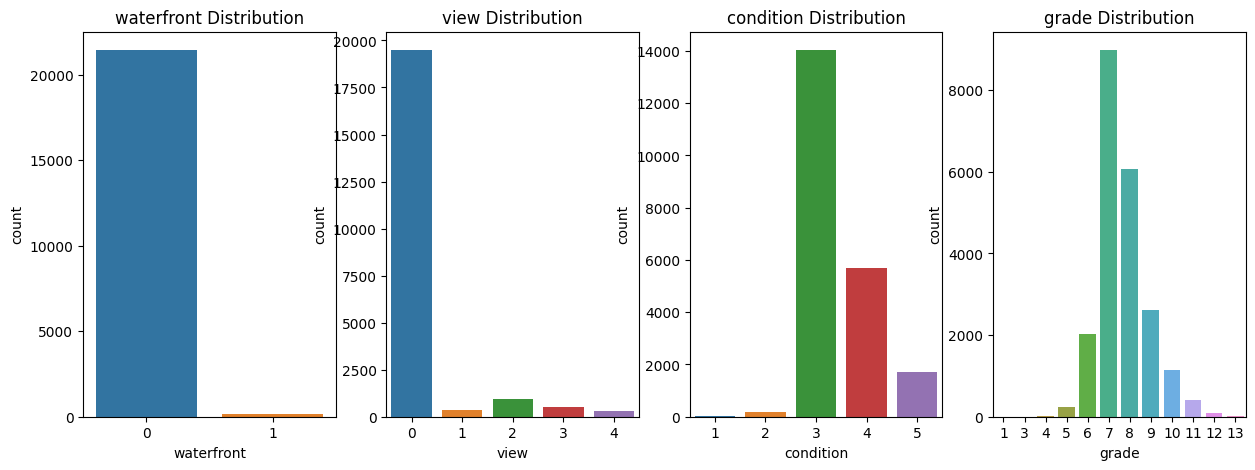

In [ ]:
# Fitur Kategorikal
categorical_features = ['waterfront', 'view', 'condition', 'grade']

# Membuat subplots sesuai dengan jumlah fitur kategorikal
num_plots = len(categorical_features)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

# Membuat bar chart untuk setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

# Menampilkan grafik batang
plt.show()

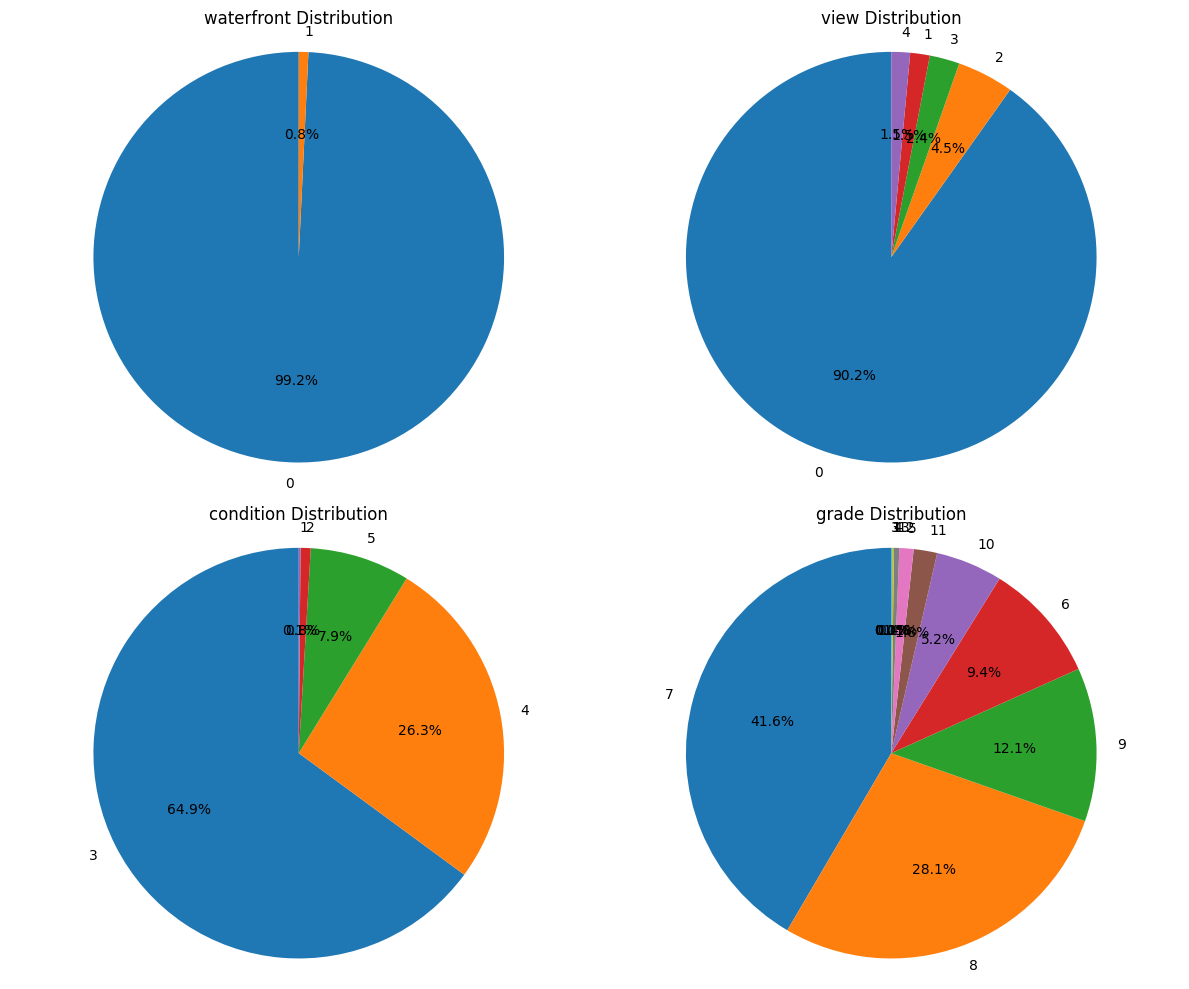

In [ ]:
# Fitur Kategorikal
categorical_features = ['waterfront', 'view', 'condition', 'grade']

# Mengatur jumlah subplot
num_plots = len(categorical_features)
num_cols = 2  # Jumlah kolom subplot
num_rows = (num_plots + num_cols - 1) // num_cols

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Membuat pie chart untuk setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols

    # Menghitung jumlah masing-masing kategori
    category_counts = df[feature].value_counts()

    # Menyiapkan data untuk pie chart
    labels = category_counts.index
    sizes = category_counts.values

    # Membuat pie chart di subplot yang sesuai
    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[row, col].axis('equal')  # Membuat lingkaran berbentuk lingkaran sempurna

    # Menambahkan judul
    axes[row, col].set_title(f'{feature} Distribution')

# Menghapus subplot kosong jika ada
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Menampilkan semua pie chart dalam satu tampilan
plt.tight_layout()
plt.show()

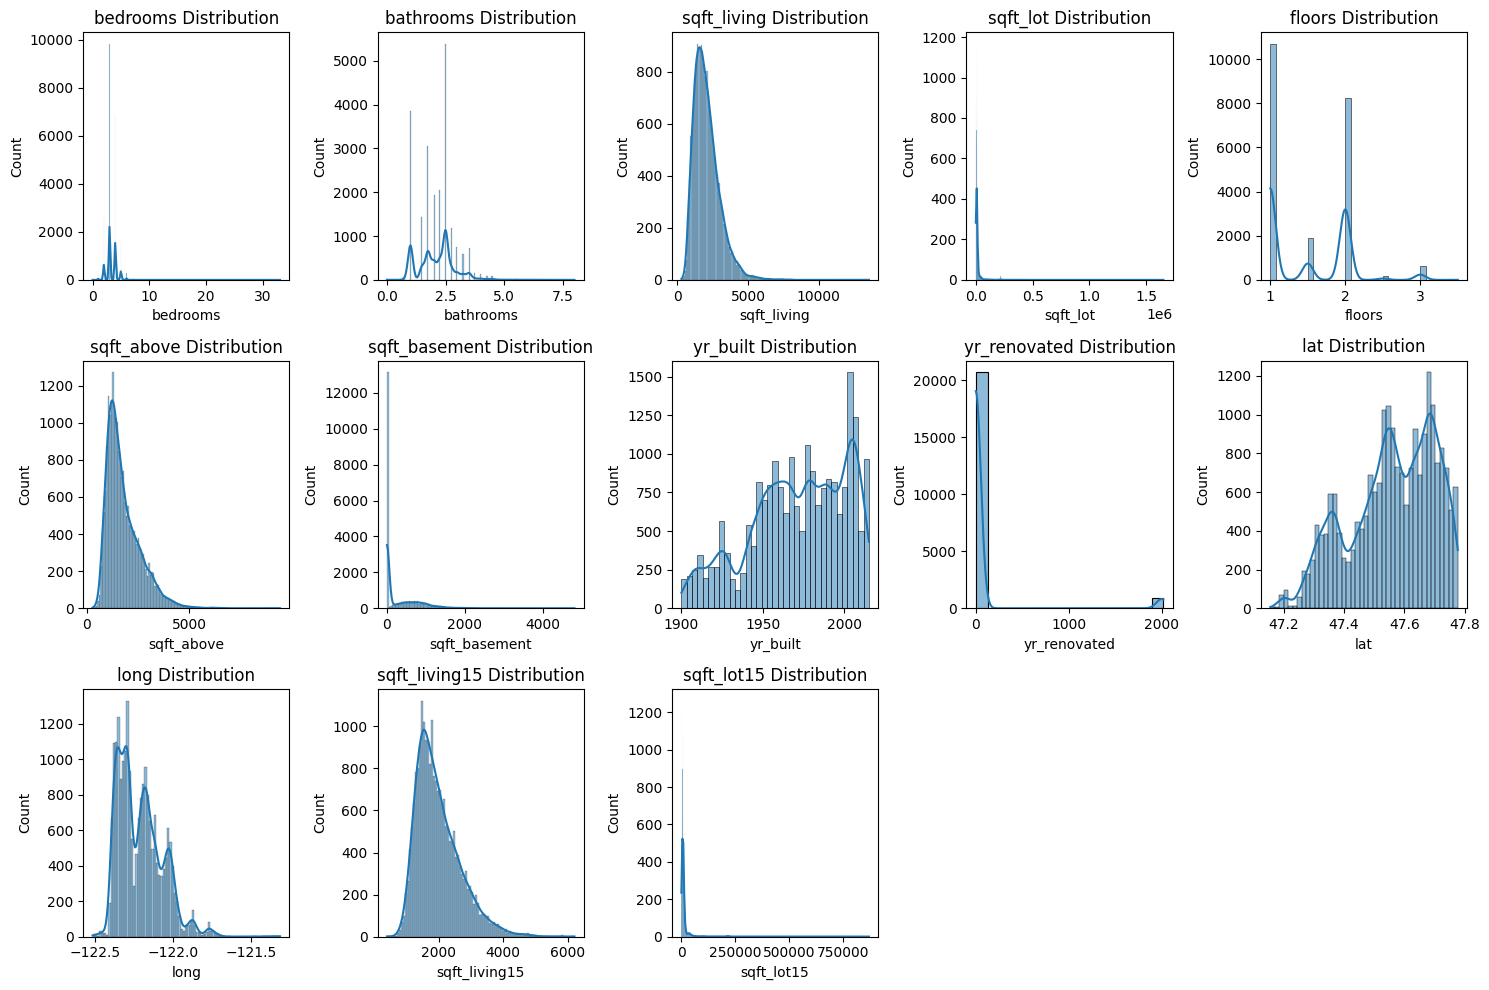

In [ ]:
# Daftar fitur numerik
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Membuat subplots sesuai dengan jumlah fitur numerik
num_plots = len(numerical_features)
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# Membuat histogram, box plot, dan density plot untuk setiap fitur numerik
for i, feature in enumerate(numerical_features):
    row = i // 5
    col = i % 5
    sns.histplot(df[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'{feature} Distribution')

# Menghapus subplot kosong jika ada
if num_plots < 3 * 5:
    for i in range(num_plots, 3 * 5):
        fig.delaxes(axes[i // 5, i % 5])

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
# Daftar fitur numerik
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Membuat visualisasi interaktif dengan kontrol bin width
for feature in numerical_features:
    fig = px.histogram(df, x=feature, marginal="box", title=feature, width=1000)
    fig.update_xaxes(categoryorder="total ascending")
    fig.show()

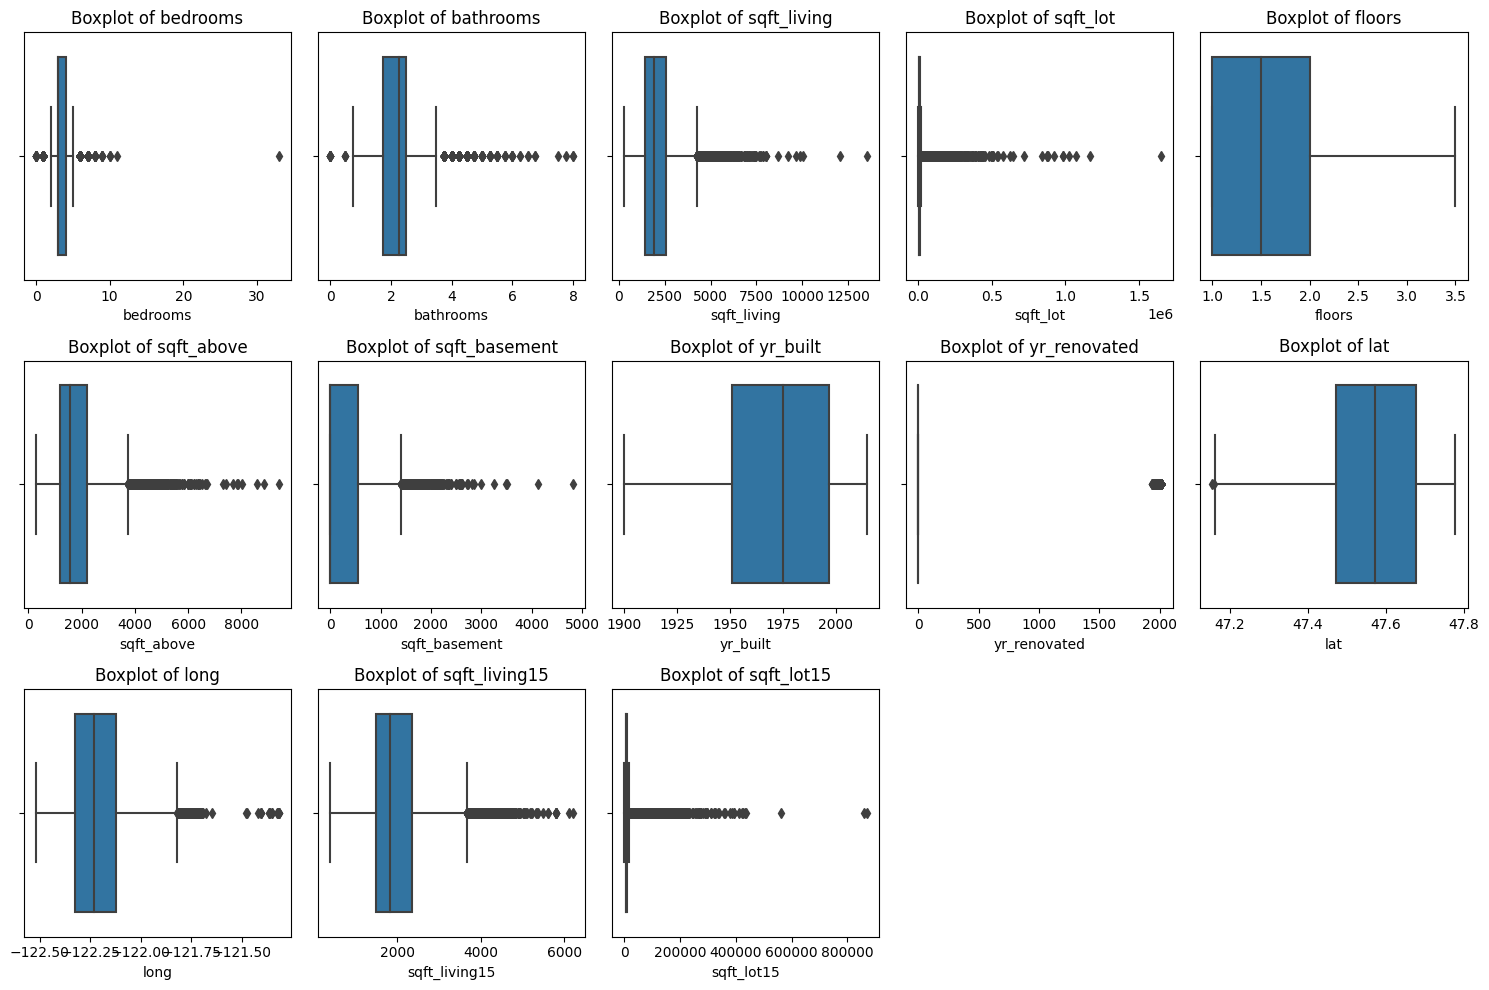

In [ ]:
# Daftar fitur numerik
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Membuat subplots untuk boxplot horizontal
num_plots = len(numerical_features)
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# Membuat boxplot horizontal untuk setiap fitur numerik
for i, feature in enumerate(numerical_features):
    row = i // 5
    col = i % 5
    sns.boxplot(data=df, x=feature, orient='h', ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')

# Menghapus subplot kosong jika ada
if num_plots < 3 * 5:
    for i in range(num_plots, 3 * 5):
        fig.delaxes(axes[i // 5, i % 5])

# Menampilkan grafik
plt.tight_layout()
plt.show()